# Household factors leading to conviction of a crime

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.utils import resample
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')
from IPython.display import clear_output
import random


## Introduction

### Executive summary

Crime prevention and ultimate elimination is one of the top priority goals of the National Development
Plan (NDP). Crime affects all people irrespective of their background, and it is a topic that attracts a lot
of media attention. Analysis will show that some groupings are affected by certain types of crime more
than others. Crime statistics are essential in order to understand the temporal and spatial dynamics of
crime.

Aggregate crime levels increased in 2017/18 compared to 2016/17. It is estimated that over 1,5 million
incidences of household crime occurred in South Africa in 2017/18, which constitutes an increase of 5%
compared to the previous year. Incidences of crime on individuals are estimated to be over 1,6 million,
which is an increase of 5% from the previous year. Aggregate household crime levels increased in Free
State, KwaZulu-Natal, North West, Gauteng and Mpumalanga. Individual crime levels increased in Free
State, North West and Gauteng. North West experienced a drastic increase of 80% in the individual
crime level. More provinces experienced an increase in household and individual crime levels if
comparisons were done using proportions instead of absolute numbers.

Housebreaking or burglary continued to be the dominant type of crime in 2017/18, accounting for 54%
of all household crimes surveyed in the Victims of Crime Survey (VOCS). An estimated 832 122
incidences of housebreaking occurred, which is a 7% increase compared to the previous year. An
estimated 156 089 incidences of home robbery occurred, constituting an increase of 3% from last year.
It is estimated that 16 809 incidences of murder occurred in 2017/18, which is an increase of about 4%
from the previous year. The definition of murder in VOCS includes culpable homicide because it is
practically impossible to separate the two types of killing in a household survey. This is one of the
reasons that the VOCS estimates differ from the figures released by the South African Police Service
(SAPS). Another reason for the VOCS murder estimates being different from those of the SAPS is that
some murders recorded by the SAPS are not known at household level; for example, murders of
immigrants that have no relatives in South Africa.

In the case of individual crimes, theft of personal property was the most dominant, accounting for about
41% of individual crimes. It is estimated that 693 219 incidences of theft of personal property occurred
in 2017/18, which is a decrease of 2% from the previous year. Robbery away from home decreased by
5%, sexual offence decreased by 61%, and assault increased by 12% from the previous year. Sexual
offence has a narrower definition in VOCS compared to the SAPS definition, which includes offences
such as bestiality and sexual acts with a corpse. On the other hand, assault is defined more broadly in
the VOCS compared to the SAPS and combines SAPS common assault and assault with intent to cause
grievous bodily harm. Disagreement between VOCS and SAPS statistics should not be a matter of
concern at this stage, as the two organisations do not use the same definitions of crime types. Moreover,
not all crime experienced by individuals is reported to the police. Despite the chall
enge of non-aligned definitions, in many cases, VOCS and SAPS trends agree for similar types of crime.

Perceptions of South Africans on crime in 2017/18 were more sceptical compared to the previous year.
About 42% thought property crime increased during the past three years. This is an increase of 6,9%
from the previous year. Those who thought violent crime increased during the past three years were
46%, which is an increase of 4,5% over the previous year. Western Cape was the most sceptical about
crime trends, as 84% of Western Cape residents thought that crime in South African increased or stayed
the same. Mpumalanga was the least sceptical among the nine provinces, where 65% thought that crime
increased or stayed the same during the past three years. Crimes that are feared most are those that
are most common. http://www.statssa.gov.za/?p=11627


With that being said, the purpose of this notebook is to predict total number of crime convitions in different households across South Africa's provinces using the data obtained from Stats SA. The dataset being used consists of variables such as household income, distance to the nearest police station, household living conditions etc.




### Questions on Household factors leading to conviction of a crime

We are going to determine the relationship between the number of crime convictions (Conviction of theft of personal property, Conviction of fraud,Conviction of assault etc.) and household living condtions (Type of toilet facility,Access to/use electricity,Victim of other crimes etc.). Does having no access to electricity lead to a person commiting more crimes? Is Conviction of assault result from being a victim of assault? Below are the subsdiary questions that we are going to address.


What variables affect conviction of a crime and how do they affect it?


1. </br>
2. </br>
3. </br>
4. </br>





<!-- #### What is being modelled
Determine the relationship between the number of crime convictions (Conviction of theft of personal property,Conviction of fraud,Conviction of assault etc.) and household living condtions (Type of toilet facility,Access to/use electricity,Victim of other crimes etc.). Does having no access to electricity lead to a person commiting more crimes? Is Conviction of assault result from being a victim of assault?

#### What are the main results
Determine if the a statistical relationship between any crime conviction to a persons living conditions, place of dwelling and overall community development. Perform statical modeling methods to predict the relationship

#### Limitations

The sample size does not represent South Africas entire population well. We used imputation methods to fill in data that was missing(e.g replacing 'Not applicable' with a 'NO') and we removed data that is not useful to our analysis( e.g  ' Unspecified, Other').Some features don’t have a clear correlation with the number of convictions and may limit the models ability to perform with high accuracy. 

 -->

### Methodology

Since we are investigating the cause and effect relationship of crime in the household dataset which consists of questions and answers that will help us with our research,the dataset used was obtained from a secondary source in which a one-to-one interview survey was conducted in person. The survey consisted 306 multiple-choice questions. The aim was to conduct the survey with as many as possible household across South Africa's pronvinces. Different surveryers of approximately 500 were distributed across the main hotspots in which surverys were to be conducted across the country on the 10th April 2017. A household occupant was defined as member of a household that is being interviewd on the day of the questioning. Participants were given 30 minutes to fill in the survery and 23380 people participated.<br/>

#### Methods of of analysis

Since analysis will be based on quantitavive data, we prepared the data using a software called SPSS to analyse our data. Before the analysis, the dataset was checked for missing data and outliers. For this the (techniques) were used. All values outside the calculted range were considered outliers . The data was further analyzed using statistical graphs. A (statistical test was used) to test our hypothesis.<br/>


### Table of content
The rest of the notebook is structured as follows:<br/>
1. Data <br/>
2. Data wrangling <br/>

# 1. Data

#### link to dataset: http://nesstar.statssa.gov.za:8282/webview/

The dataset was collected by the stats SA under the 2017 Victims of Crime Survey (VOCS) on April 10th, 2017. The dataset was done through one-to-one survey by 500 surveryers distributed across 9 provinces. The survey was targetting hotspots areas in which crime is high in such particular province .

* Collection method: A one-to-one interview survey was conducted in person. The survey consisted 306 multiple-choice questions. The aim was to conduct the survey with as many as possible household across South Africa's pronvinces. Different surveryers of approximately 500 were distributed across the main hotspots in which surverys were to be conducted across the country. Participants were given 30 minutes to fill in the survery and 23380 people participated. <br/>

* Date collected: April 10, 2017
* Date Downloaded: April 07, 2021
* Data size: 23380 rows, 307 columns


## Validation  of the data

While the VOCS cannot replace police statistics, it can be a rich source of information that will assist in
the planning of crime prevention and provide a more holistic picture of crime in South Africa. The data
can be used for the development of policies and strategies, as well as for crime prevention and public
education programmes. This report ventures into exploring the possibility of integrating the VOCS and
SAPS crime statistics by tabulating estimates from VOCS and statistics released by SAPS for every
category of crime that is common to both sources. The biggest challenge in this project is the difference
of definitions of crime categories used by VOCS and SAPS. For example, "murder" for VOCS includes
both the intentional and unintentional killing of a human being, while for SAPS "murder" only refers to
the intentional killing of a human being. For SAPS, "sexual offence" includes bestiality while in VOCS it
is limited to sexual violations against human beings.<br/>

Like other household surveys conducted by Stats SA, VOCS is designed to produce accurate estimates
at national and provincial levels. The accuracy of estimates at lower levels or small areas cannot be
guaranteed. Small areas include specific demographic or social groupings of interest such as children
under 15 or sex workers. VOCS data cannot produce sexual offence statistics for children under 15 or
murders of sex workers. Statistics for small areas require specialised methodologies that are not readily
available in Stats SA. Some of the institutions that use these methodologies for small areas are the
South Africa Medical Research Council, the Human Sciences Research Council (HSRC) and
universities.


## Variable Encoding

##### Q61035POLICE: Police on the streets in the local area
0 - NO<br/>
1 - YES<br/>

##### Q61038LIGHT: Street lights in the neighbourhood
0 - NO<br/>
1 - YES<br/>

#### Q224ANOMONEY:No money to buy food

0 - NO<br/>
1 - YES<br/>



In [21]:
DF = pd.read_csv('dataset.csv')
DF.head()



,province_code,Q229NETINCOME,Ageofhead,Q61035POLICE,Q61038LIGHT,Q224ANOMONEY,income,Total_IOPBV,Total_number_of_convictions,Q531FOOD,...,Q531CLINIC,Q531HOSPITAL,Q531POLICE,Q531RELIG,Q531BANK,Q531POSTOFF,Q531WELFARE,Q531MULTI,Q653AREA,Q658VALUE
0,8.0,1000.0,35.0,2,2,1.0,0.0,0,0,820,...,14216,2396,595,3319,711,1679,-777,1022,-777,-777
1,6.0,15000.0,51.0,2,2,1.0,0.0,1,0,779,...,469,24140,24748,893,20661,22125,25199,29095,-777,-777
2,7.0,3000.0,53.0,1,2,2.0,0.0,0,0,433,...,744,3848,290,409,675,965,624,751,-777,-777
3,2.0,0.0,54.0,2,2,1.0,0.0,0,0,3218,...,4198,25348,23501,429,23028,29930,25250,27453,-777,-777
4,7.0,200.0,55.0,2,2,1.0,0.0,0,0,636,...,1137,7584,761,803,1480,5282,891,722,-777,-777


### Validation

### Accuracy

### Completeness
Not all records are present in the dataset as it can be seen below that there are 7468 null values in the dataset.

In [16]:
DF.isnull().values.sum()

7468

### Consistency

### Uniformity

(15075, 24)

In [22]:
def convert_to_continous(parent_dataframe, col_name, ranges,null_value,unspecified = 88):
    child_dataframe = parent_dataframe[col_name].copy()
    index = []
    for i,v in child_dataframe.iteritems():
        index.append(i)
        if v == null_value:
            value = -999
        elif v == unspecified:
            value = -777
        else:
            value = random.randint(ranges[v][0], ranges[v][1])
        child_dataframe[i] = value
    del parent_dataframe[col_name]
    updated = pd.concat([parent_dataframe, child_dataframe], axis=1)
    return updated



In [20]:
D_COPY = MY_DATA.copy()

ranges = [[0,0], [0, 500],[500, 1000], [1000,2000], [2000,5000], [5000,10000], [10000,20000], [20000,30000],[-666,-666],
          [-777,-777], [-888,-888]]

ranges2 = [[0,0], [0,30],[30,59],[59,119],[119,240],[240,360],[],[],[-777,-777],[-999,-999]]

ranges3 = [
    [],[0,5000], [5000,10000], [10000,20000], [20000,50000], [50000,100000], [100000,250000], [250000,500000],
    [500000,1000000], [1000000,2000000], [2000000, 3000000], [3000000,4000000],[4000000,5000000],[-666,-666]]
col_names = [
    'Q531FOOD', 'Q531PUBTRAN', 'Q531PREPRIM', 'Q531PRIM', 'Q531SECOND', 'Q531CLINIC', 'Q531HOSPITAL',
    'Q531POLICE', 'Q531RELIG', 'Q531BANK', 'Q531POSTOFF', 'Q531WELFARE', 'Q531MULTI']

for col_name in col_names:
    D_COPY = convert_to_continous(D_COPY, col_name, ranges, 99)

D_COPY = convert_to_continous(D_COPY,'Q653AREA',ranges2,9)
D_COPY = convert_to_continous(D_COPY,'Q658VALUE',ranges3,99)

D_COPY
D_COPY.to_csv('dataset.csv', index=False)

## Data Wrangling

### Tidyness of the data
We are going to drop the values that represents no answer from surveyors. <br/>

Value that represents NaN values are as follows: <br/>


1. -777 - Other<br/>
2. -666 - Don't Know<br/>
3. 9 - Unspecified<br/>
4. -888 - Not applicable<br/>

The dataset also included empty cells indicated as NaN<br/>

In [88]:
duplicates = DF.duplicated(['Q531FOOD', 'Q531PUBTRAN', 'Q531PREPRIM', 'Q531PRIM', 'Q531SECOND', 'Q531CLINIC', 'Q531HOSPITAL',
    'Q531POLICE', 'Q531RELIG', 'Q531BANK', 'Q531POSTOFF', 'Q531WELFARE', 'Q531MULTI', 'Q61035POLICE', 'Q61038LIGHT','income',
    'Q224ANOMONEY', 'Total_IOPBV', 'Total_number_of_convictions','Q224ANOMONEY','Q653AREA','Ageofhead'])
np.count_nonzero(duplicates)


0

There are no duplicates in the dataset

### Distribution of the data

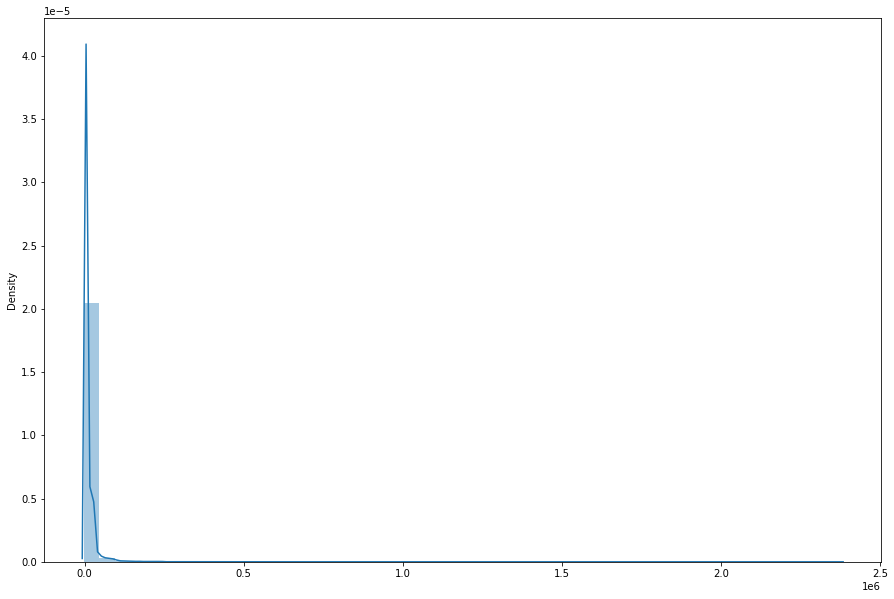

In [90]:
fig,ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sns.distplot(DF)

In [95]:

DF_DIRTY = DF.copy()
# We will be droping  rows due to the fact that they represent 'Nan'
# drop 9 - Unspecified
DF_DIRTY = DF_DIRTY.drop(DF_DIRTY[(DF_DIRTY.Q61035POLICE == 9) | (DF_DIRTY.Q61038LIGHT == 9) | (DF_DIRTY.Q224ANOMONEY == 9)].index )

# drop -888 - Not applicable
DF_DIRTY = DF_DIRTY.drop(DF_DIRTY[(DF_DIRTY.Q531FOOD == -888) | (DF_DIRTY.Q531PUBTRAN == -888) | (DF_DIRTY.Q531PREPRIM == -888) 
                                  | (DF_DIRTY.Q531PRIM == -888) | (DF_DIRTY.Q531SECOND ==-888) | (DF_DIRTY.Q531CLINIC == -888) |
                                  (DF_DIRTY.Q531HOSPITAL == -888) | (DF_DIRTY.Q531POLICE == -888)| (DF_DIRTY.Q531RELIG == -888)
                                     | (DF_DIRTY.Q531BANK == -888) | (DF_DIRTY.Q531MULTI == -888)| (DF_DIRTY.Q531POSTOFF == -888) | (DF_DIRTY.Q531WELFARE == -888)].index) 
# drop -777 - Other
DF_DIRTY = DF_DIRTY.drop(DF_DIRTY[  (DF_DIRTY.Q658VALUE == -777) | (DF_DIRTY.Q531FOOD == -777 ) | (DF_DIRTY.Q531PUBTRAN == -777) | (DF_DIRTY.Q531PREPRIM == -777) 
                                  | (DF_DIRTY.Q531PRIM == -777) | (DF_DIRTY.Q531SECOND ==-777) | (DF_DIRTY.Q531CLINIC == -777) |
                                  (DF_DIRTY.Q531HOSPITAL == -777) | (DF_DIRTY.Q531POLICE == -777)| (DF_DIRTY.Q531RELIG == -777)
                                     | (DF_DIRTY.Q531BANK == -777) | (DF_DIRTY.Q531MULTI == -777)| (DF_DIRTY.Q531POSTOFF == -777) | (DF_DIRTY.Q531WELFARE == -777)].index) 
# drop -666 - Don't Know
DF_DIRTY = DF_DIRTY.drop(DF_DIRTY[(DF_DIRTY.Q658VALUE == -666) |(DF_DIRTY.Q531FOOD == -666 ) | (DF_DIRTY.Q531PUBTRAN == -666) | (DF_DIRTY.Q531PREPRIM == -666) 
                                  | (DF_DIRTY.Q531PRIM == -666) | (DF_DIRTY.Q531SECOND ==-666) | (DF_DIRTY.Q531CLINIC == -666) |
                                  (DF_DIRTY.Q531HOSPITAL == -666) | (DF_DIRTY.Q531POLICE == -666)| (DF_DIRTY.Q531RELIG == -666)
                                     | (DF_DIRTY.Q531BANK == -666) | (DF_DIRTY.Q531MULTI == -666)| (DF_DIRTY.Q531POSTOFF == -666) | (DF_DIRTY.Q531WELFARE == -666)].index) 


DF_DIRTY= DF_DIRTY.dropna()
DF_DIRTY


,province_code,Q229NETINCOME,Ageofhead,Q61035POLICE,Q61038LIGHT,Q224ANOMONEY,income,Total_IOPBV,Total_number_of_convictions,Q531FOOD,...,Q531CLINIC,Q531HOSPITAL,Q531POLICE,Q531RELIG,Q531BANK,Q531POSTOFF,Q531WELFARE,Q531MULTI,Q653AREA,Q658VALUE
70,8.0,2000.0,77.0,1,1,1.0,362.281096,0,0,9934,...,4940,9092,8458,705,6514,8676,2697,7998,4,1782
73,8.0,5000.0,55.0,2,1,1.0,355.355991,0,0,13,...,13045,20008,20276,701,10763,13046,29617,28118,23,4868
74,1.0,1500.0,49.0,1,2,1.0,363.727741,1,0,480,...,427,4887,211,304,3003,887,21,450,26,575
75,7.0,5000.0,41.0,2,1,2.0,363.727741,0,0,1606,...,4225,4333,4769,2713,3619,2836,3889,4782,44,3955
77,9.0,1500.0,29.0,1,2,1.0,836.123491,0,0,562,...,782,13543,10909,893,24980,861,718,560,32,5442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15066,1.0,5000.0,31.0,2,1,1.0,50391.723893,0,0,341,...,25,965,883,163,782,653,769,250,50,87421
15067,4.0,12000.0,60.0,1,1,2.0,151184.039310,0,0,26,...,254,2129,-999,85,4312,4028,4600,490,82,220123
15068,2.0,10000.0,62.0,1,1,2.0,176425.546420,0,0,291,...,1768,4528,1534,478,1888,1642,2678,209,171,459080
15069,2.0,7000.0,68.0,2,2,2.0,75619.419217,0,0,608,...,4406,5962,8557,953,29811,29937,22259,26336,129,493079


In [94]:
DF_DIRTY['Q61038LIGHT'].replace({2:0}, inplace = True)
DF_DIRTY['Q61038LIGHT'].replace({3:0}, inplace = True)


DF_DIRTY['Q61035POLICE'].replace({2:0}, inplace = True)
DF_DIRTY['Q61035POLICE'].replace({3:0}, inplace = True)

DF_DIRTY['Q224ANOMONEY'].replace({2:0}, inplace = True)
DF_DIRTY


,province_code,Q229NETINCOME,Ageofhead,Q61035POLICE,Q61038LIGHT,Q224ANOMONEY,income,Total_IOPBV,Total_number_of_convictions,Q531FOOD,...,Q531CLINIC,Q531HOSPITAL,Q531POLICE,Q531RELIG,Q531BANK,Q531POSTOFF,Q531WELFARE,Q531MULTI,Q653AREA,Q658VALUE
70,8.0,2000.0,77.0,1,1,1.0,362.281096,0,0,9934,...,4940,9092,8458,705,6514,8676,2697,7998,4,1782
73,8.0,5000.0,55.0,0,1,1.0,355.355991,0,0,13,...,13045,20008,20276,701,10763,13046,29617,28118,23,4868
74,1.0,1500.0,49.0,1,0,1.0,363.727741,1,0,480,...,427,4887,211,304,3003,887,21,450,26,575
75,7.0,5000.0,41.0,0,1,0.0,363.727741,0,0,1606,...,4225,4333,4769,2713,3619,2836,3889,4782,44,3955
77,9.0,1500.0,29.0,1,0,1.0,836.123491,0,0,562,...,782,13543,10909,893,24980,861,718,560,32,5442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15066,1.0,5000.0,31.0,0,1,1.0,50391.723893,0,0,341,...,25,965,883,163,782,653,769,250,50,87421
15067,4.0,12000.0,60.0,1,1,0.0,151184.039310,0,0,26,...,254,2129,-999,85,4312,4028,4600,490,82,220123
15068,2.0,10000.0,62.0,1,1,0.0,176425.546420,0,0,291,...,1768,4528,1534,478,1888,1642,2678,209,171,459080
15069,2.0,7000.0,68.0,0,0,0.0,75619.419217,0,0,608,...,4406,5962,8557,953,29811,29937,22259,26336,129,493079


<!-- DF_DIRTY = DF_DIRTY.drop(DF_DIRTY[(DF_DIRTY.Q61035POLICE == 9) | (DF_DIRTY.Q61038LIGHT == 9) | (DF_DIRTY.Q224ANOMONEY == 9)].index ) -->


### Sense Checks
1. First we are checking if every attribute has the correct datatype<br/>

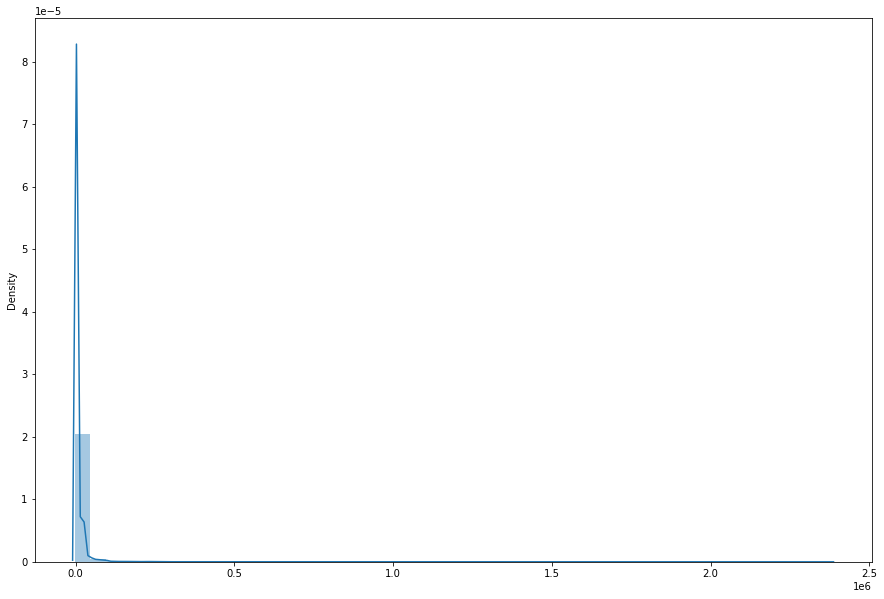

In [93]:
fig,ax = plt.subplots()
fig.set_size_inches(15, 10)
ax = sns.distplot(DF_DIRTY)

The attributes are in the correct datatype

In [ ]:
DATA.groupby("province_code").count()["index"]

2.1 We are checking the frequency of each attribute by each province to see if we have covered enough samples per province. From the output we can say that we have covered enough samples per province since the counts are not that different from each other.<br/>

In [ ]:
groupby_value = DATA.groupby("Q658VALUE").count()["index"]
groupby_value

2.2 The data is skewed to the right, which makes sense because there are less people who live in houses that are valued at more that R500,000 and above (from index 8).

## Exploratory Analyses

Firstly, to explore the relationship between Province,Income,Household living conditons, the timeframe in which the household has no money for 5 days or more and the total number of Instances Of Person Being a Victim and  total number of conviction of a crime, the relationships between these variables against total number of conviction of a crime are plotted.

In [ ]:
sns.jointplot(data=DATA, x="Total_number_of_convictions", y="Total_IOPBV")

In [ ]:
income = DATA.income
convictions = DATA.Total_number_of_convictions

fig,ax = plt.subplots()
fig.set_size_inches(10, 10)
ax.bar(convictions,income)
plt.title('Income vs Total number of convictions')
plt.xlabel('Total number of convictions')
plt.ylabel('income (Rands)')
ax.set_xticks(range(21))
plt.show()


As it can be seen from the plot(Income vs Total number of convictions), households with people earning alot of money have less total number of convections compared to those earning less income.

In [ ]:
living_condition = DATA.Q116PRESENT
convictions = DATA.Total_number_of_convictions

labels = ['Wealthy','Very comfortable','Reasonably comfortable',
                    'Just getting along','Poor','Very poor']
x = [1,2,3,4,5,6]

fig,ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.xticks(x, labels, rotation='vertical')
ax.bar(living_condition,convictions)
ax.set_xticks(x)
ax.set_yticks(range(21))
ax.set_xticklabels(labels)

plt.title('Household living condition vs Total number of convictions')
plt.ylabel('Total number of convictions')
plt.xlabel('living conditions')
plt.show()

As it can be seen from the plot that household living in a wealthy, very comfortable and reasonably comfortable living conditions face less crime convictions than those living in poor cnditions 

In [ ]:
police_dist = DATA.Q531POLICE
convictions = DATA.Total_number_of_convictions


labels = ['Less than 500m','500m – less than 1km','1km – less than 2km',
                    '2km – less than 5km','5km – less than 10km','10km – less than 20km','20km or more']
x = [1,2,3,4,5,6,7]

fig,ax = plt.subplots()
fig.set_size_inches(15, 10)
plt.xticks(x, labels, rotation='vertical')
ax.set_xticks(x)
ax.set_yticks(range(21))
ax.set_xticklabels(labels)
ax.bar(police_dist,convictions)
plt.title('Distance from the police station vs Total number of convictions')
plt.ylabel('Total number of convictions')
plt.xlabel('Distance from the police station in km')
plt.show()


As it can be seen from the plot that distance of households which are not far from the from the police station have less crime convections and house hold having a distance of 20km or more from the police station experience more crime converctions

In [ ]:
age_of_head = DATA.Ageofhead  
convictions = DATA.Total_number_of_convictions
# plt.bar(no_food, convictions)
fig,ax = plt.subplots()

ax.bar(convictions,age_of_head)
fig.set_size_inches(10, 10)
ax.set_xticks(range(21))
# ax.set_xticklabels(['Yes','No'])
plt.title('Age of household head vs Total number of convictions' )
plt.ylabel('Total number of convictions')
plt.ylabel('Age of household head')
# plt.set_xticks([1,2])
plt.show()


As it can be seen from the plot that households that had no money for 5 days have more crime convections than households that had money

In [ ]:
age_of_head = DATA.Q224ANOMONEY  
convictions = DATA.Total_number_of_convictions
# plt.bar(no_food, convictions)
fig,ax = plt.subplots()

ax.bar(convictions,age_of_head)
fig.set_size_inches(10, 10)
ax.set_xticks(range(21))
ax.set_xticklabels(['Yes','No'])
plt.title('Age of household head vs Total number of convictions' )
plt.ylabel('Total number of convictions')
plt.ylabel('Age of household head')
# plt.set_xticks([1,2])
plt.show()

The number of instances of person being a victim to a crime vs total number of convictions plot shows that it is less likely that a person who has been a victim more than 3 times to be convicted of a crime. A person who has been a victim 7 times is less likely than a person who has never been a victim to be convicted of a crime. On the other hand a person who has been a victim three times has the highest chances of being convicted of a crime.

In [ ]:
df1 = DATA[['Total_IOPBV','Total_number_of_convictions','income']]
df1_corr = df1.corr()
df1_corr

In [ ]:
b = pd.plotting.scatter_matrix(df1, figsize=(10,10))

From the correlation matrix of Total number of convictions,Total number of Instances Of Person Being a Victim, and income we can see that the correlation values are very close to zero, this indicates that the might not be a linear relationship between the variable but they are somewhat correlated.